In [44]:
import numpy as np
import pandas as pd
from scipy.stats import gamma, nbinom
import matplotlib.pyplot as plt

## Načítavanie dát z excelu do pandas dataframe

In [15]:
df = pd.read_excel('Projekt-2_Data.xlsx', sheet_name='Úloha 1')

In [155]:
df

,uloha_1 a),uloha_1 b)_prior,skupina,uloha_1 b)_pozorování
0,2.0,3.634785,0,3.626656
1,2.0,2.868113,0,3.008269
2,1.0,2.149160,0,2.989829
3,3.0,4.263065,0,2.371630
4,0.0,2.594745,0,4.009366
...,...,...,...,...
99995,NaN,1.725637,9999,NaN
99996,NaN,4.048414,9999,NaN
99997,NaN,3.000662,9999,NaN
99998,NaN,3.058451,9999,NaN


In [34]:
df1 = df[['uloha_1 a)']].dropna().astype(int)
df1.mean()

uloha_1 a)    1.66
dtype: float64

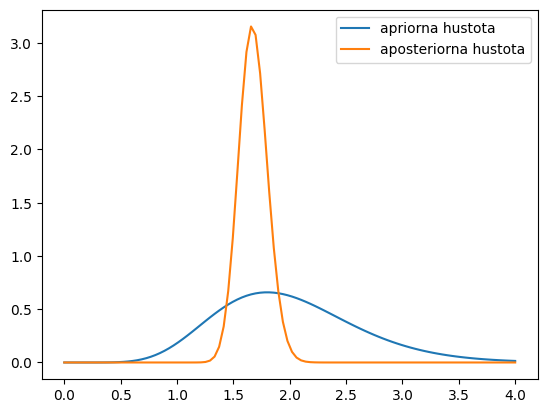

In [143]:
fig, ax = plt.subplots(1,1)

x = np.linspace(0, 4, 100)

a = 10
b = 5

ax.plot(x, gamma.pdf(x, a, scale=1/b), label='apriorna hustota')
ax.plot(x, gamma.pdf(x, a + df1.sum(), scale=1/(b + len(df1))), label='aposteriorna hustota')

ax.legend()
fig.savefig("u1a1.png")

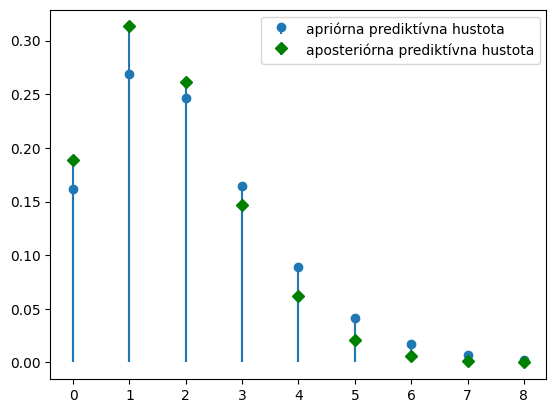

In [142]:
fig, ax = plt.subplots(1, 1)
x = np.arange(0, 9)

a2 = a + df1.sum()
b2 = b + len(df1)

nbinom_apost = nbinom(a2, b2 / (1 + b2))
nbinom_apri = nbinom(a, b / (1 + b))

ax.stem(x, nbinom_apri.pmf(x), basefmt=" ", label='apriórna prediktívna hustota')
ax.stem(x, nbinom_apost.pmf(x), basefmt=" ", label='aposteriórna prediktívna hustota', markerfmt='gD')
ax.xaxis.set_ticks(x)
ax.legend()
fig.savefig("u1a2.png")

In [127]:
apost_int = gamma.ppf(0.025, a2, scale=1/b2), gamma.ppf(0.975, a2, scale=1/b2)
apri_int = gamma.ppf(0.025, a, scale=1/b), gamma.ppf(0.975, a, scale=1/b)
print(apost_int, apri_int)

(array([1.43769383]), array([1.93272075])) (0.9590777392264868, 3.416960690283833)


In [151]:
# gamma_aprior = gamma.pdf(x, a, scale=1/b)
gamma_aposterior = gamma(a + df1.sum(), scale=1/(b + len(df1)))
aposterior_mean = gamma_aposterior.mean()
aposterior_median = gamma_aposterior.median()

print("mean:", aposterior_mean, "median:", aposterior_median)

mean: [1.67619048] median: [1.67301694]


In [154]:
apost_predict_mean = nbinom_apost.mean()
apri_predict_mean = nbinom_apri.mean()

print("apost mean:", apost_predict_mean, "apri mean:", apri_predict_mean)

apost mean: [1.67619048] apri mean: 1.9999999999999996
